# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Optimization: Part One
This code imports three essential Python libraries commonly used in scientific computing and optimization tasks:

- `import numpy as np`: Imports NumPy, a fundamental library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them efficiently.
- `from matplotlib import pyplot as plt`: Imports the `pyplot` module from Matplotlib, which is a popular library for creating static, interactive, and animated visualizations in Python. The alias `plt` is a common convention and is used to generate plots and charts.
- `from scipy.optimize import linprog`: Imports the `linprog` function from the `scipy.optimize` module. `linprog` is used to solve linear programming problems, which involve optimizing a linear objective function subject to linear equality and inequality constraints.

The `# type: ignore` comments are included to suppress type-checking warnings from tools like mypy, which can be helpful if type stubs for these libraries are not available. Together, these imports set up the environment for performing numerical computations, visualizing results, and solving optimization problems.

In [1]:
import numpy                        as np  # type: ignore
from   matplotlib     import pyplot as plt # type: ignore
from   scipy.optimize import linprog       # type: ignore

## Defining an objective function

This code defines a simple objective function named `objective` that takes two input variables, `x` and `y`. The function returns the value of the linear expression `5 * x + 10 * y`. In the context of optimization, this function represents the objective that you want to maximize or minimize, depending on the problem setup. The coefficients (5 and 10) indicate the relative contribution of each variable to the objective value. Such linear objective functions are common in linear programming, where the goal is to find the values of `x` and `y` that optimize this function subject to certain constraints.

In [2]:
def objective(x, y):
    return 5 * x + 10 * y

This code snippet sets up a grid of values to evaluate the objective function over a range of possible inputs. The first line, `x = np.linspace(0, 10, 101)`, creates an array of 101 evenly spaced values between 0 and 10 for the variable `x`. Similarly, `y = np.linspace(-5, 5, 101)` creates 101 evenly spaced values between -5 and 5 for the variable `y`. 

The line `objective_matrix = np.zeros((101, 101))` initializes a 2D NumPy array filled with zeros, which will be used to store the computed values of the objective function for each combination of `x` and `y`. The nested `for` loops iterate over all possible pairs of `x` and `y` values: `enumerate(x)` provides both the index `i` and the value `xi` for `x`, and `enumerate(y)` does the same for `y` with `j` and `yj`. Inside the inner loop, the code (though incomplete in the snippet) is intended to evaluate the objective function at each `(xi, yj)` pair and store the result in the corresponding position of `objective_matrix`. This process effectively creates a grid of objective function values, which is useful for visualizing how the function behaves over the specified ranges of `x` and `y`.

In [3]:
x = np.linspace(0, 10, 101)
y = np.linspace(-5, 5, 101)
objective_matrix = np.zeros((101, 101))
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        objective_matrix[i, j] = objective(xi, yj)

This code defines and calls a function, `plot_objective`, which visualizes a 2D grid of objective function values using Matplotlib. Inside the function, `plt.figure(figsize=(8, 8))` creates a new figure with a square aspect ratio for better visualization. The `plt.imshow(objective_matrix.T, origin='lower')` line displays the transposed `objective_matrix` as an image, where each pixel's color represents the value of the objective function at a specific (x, y) coordinate. The `origin='lower'` argument ensures that the plot's origin matches the mathematical convention, with (0, 0) at the bottom-left.

A colorbar is added with `plt.colorbar()` to indicate the mapping between colors and objective values. The plot is labeled with a title and axis labels using `plt.title('Objective')`, `plt.xlabel('X')`, and `plt.ylabel('Y')`. The x- and y-axis ticks are set to match the original ranges of the variables: `plt.xticks` and `plt.yticks` use `np.linspace` to create evenly spaced tick positions and labels, with the x-axis ranging from 0 to 10 and the y-axis from -5 to 5. The x-axis labels are rotated for readability.

Finally, `plot_objective()` is called to generate the plot, and `plt.show()` displays it. This visualization helps you understand how the objective function behaves across the specified ranges of x and y, making it easier to interpret optimization results or constraints.

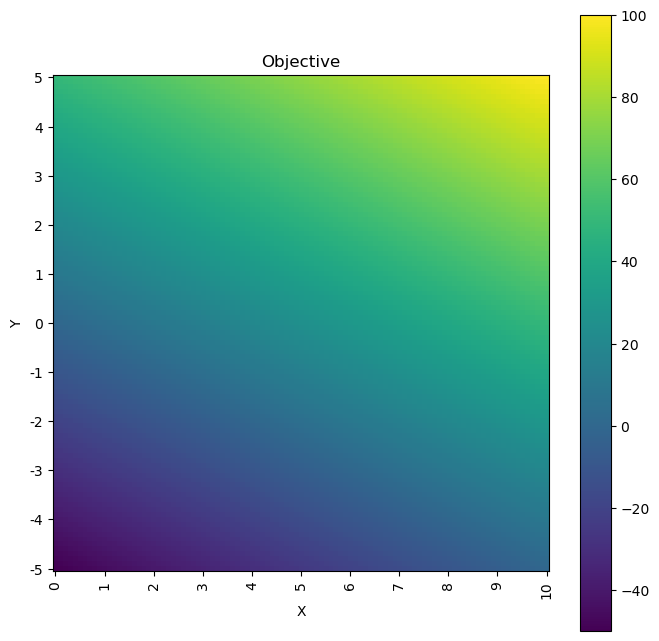

In [4]:
def plot_objective():
    plt.figure(figsize=(8, 8))
    plt.imshow(objective_matrix.T, origin='lower')
    plt.colorbar()
    plt.title('Objective')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(np.linspace(0, 100, 11), np.linspace(0, 10, 11).astype(int), rotation=90)
    plt.yticks(np.linspace(0, 100, 11), np.linspace(-5, 5, 11).astype(int))
plot_objective()
plt.show()

## Isoquant lines
Represent the points in the objective function that have the same value.
This code visualizes isoquant lines—curves where the objective function has the same value—on top of the previously plotted objective function grid. The `plot_objective()` function first displays the background grid of objective values for different combinations of `x` and `y`.

Each `plt.plot(...)` call draws a line corresponding to a specific value of the objective function, such as `5x + 10y = 5`, `5x + 10y = 10`, and so on. The equations are rearranged to solve for `y` in terms of `x`, and the resulting lines are plotted over the grid. The multiplication by 10 scales the axes to match the pixel-based plotting grid used in `plot_objective()`.

The `plt.legend(...)` function adds a legend to the plot, labeling each isoquant line with its corresponding equation. Finally, `plt.show()` displays the complete plot. This visualization helps you see how the objective function changes and where different levels of the function lie within the variable space, which is useful for understanding optimization landscapes.

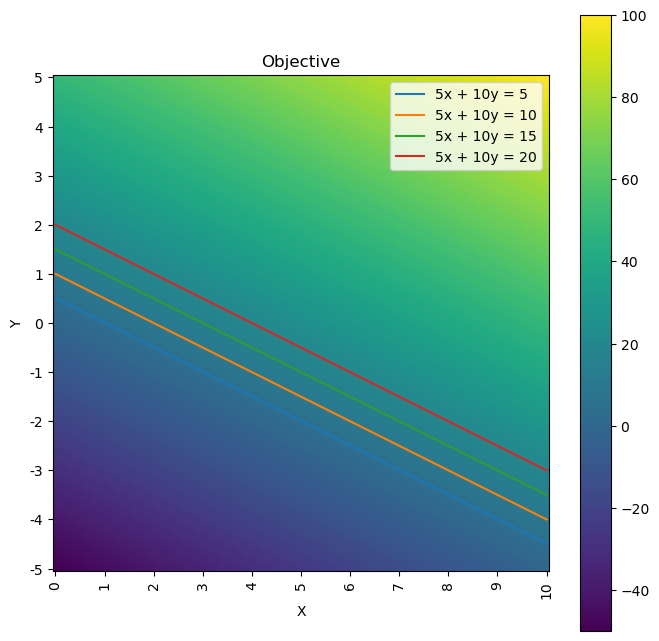

In [5]:
plot_objective()
plt.plot(10 * x, 10 * (5 * x -  5) / (-10) + 10 * 5) # 5x + 10y = 5
plt.plot(10 * x, 10 * (5 * x - 10) / (-10) + 10 * 5) # 5x + 10y = 10
plt.plot(10 * x, 10 * (5 * x - 15) / (-10) + 10 * 5) # 5x + 10y = 15
plt.plot(10 * x, 10 * (5 * x - 20) / (-10) + 10 * 5) # 5x + 10y = 20
plt.legend(['5x + 10y = 5', '5x + 10y = 10', '5x + 10y = 15', '5x + 10y = 20'])
plt.show()

## Constraints
Define the limits of the feasible region.

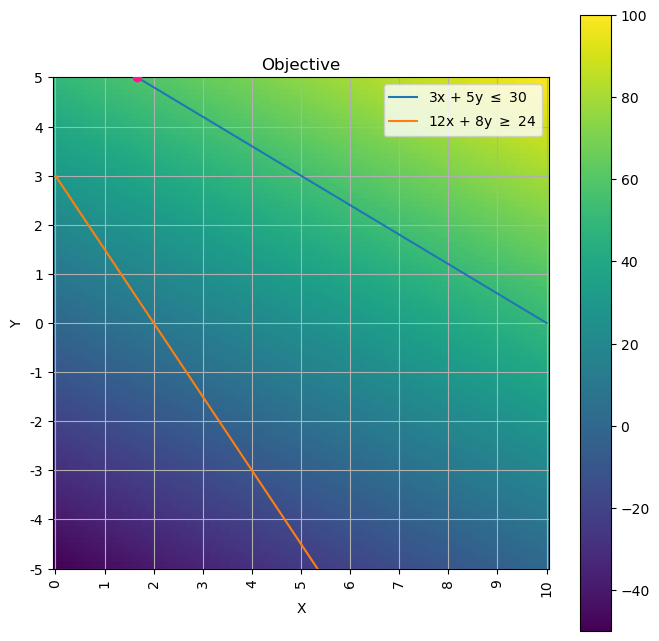

In [6]:
plot_objective()
plt.plot(10 * x, 10 * ( 3 * x - 30) / (-5) + 10 * 5) #  3x + 5y <= 30
plt.plot(10 * x, 10 * (12 * x - 24) / (-8) + 10 * 5) # 12x + 8y >= 24
plt.scatter(10 * 1.667, 10 * (5 + 5), c='deeppink', zorder=10)
plt.ylim(0, 100)
plt.legend(['3x + 5y $\\leq$ 30', '12x + 8y $\\geq$ 24'])
plt.grid()
plt.show()

## Finding the solution

This code sets up and solves a linear programming problem using the `linprog` function from SciPy. The goal is to minimize a linear objective function subject to a set of linear inequality constraints.

- `obj = [-5.0, -10.0]` defines the coefficients of the objective function to be minimized. Since `linprog` minimizes by default, using negative coefficients effectively turns this into a maximization problem for `5x + 10y`.
- `lhs_ineq` is a list of lists representing the coefficients of the inequality constraints (the left-hand side of each constraint).
- `rhs_ineq` is a list of the right-hand side values for each inequality constraint.

Each row in `lhs_ineq` and the corresponding value in `rhs_ineq` together define a constraint of the form `A_ub @ x <= b_ub`. For example, the first constraint is `3x + 5y <= 30`, and the second is `-12x - 8y <= -24` (which can be rearranged to `12x + 8y >= 24`). The remaining constraints enforce bounds on the variables `x` and `y`.

The `linprog` function is called with these parameters, and the result (`opt`) contains the solution to the optimization problem, including the optimal values of the variables, the minimum value of the objective function, and information about the solver's success. Displaying `opt` allows you to inspect the results and verify whether the constraints and objective were satisfied as expected.

In [10]:
obj = [-5.0, -10.0]
lhs_ineq = [[  3.0,  5.0], 
            [-12.0, -8.0],
            [ -1.0, -0.0],
            [  1.0,  0.0],
            [ -0.0, -1.0],
            [  0.0,  1.0]]
rhs_ineq = [ 30,
            -24,
              0,
             10, 
              5,
              5]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -58.333333333333336
              x: [ 1.667e+00  5.000e+00]
            nit: 1
          lower:  residual: [ 1.667e+00  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.600e+01  1.667e+00  8.333e+00
                              1.000e+01  0.000e+00]
                 marginals: [-1.667e+00 -0.000e+00 -0.000e+00 -0.000e+00
                             -0.000e+00 -1.667e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

## Solving the bus example


This code formulates and solves a linear programming problem using SciPy's `linprog` function. The goal is to minimize a linear objective function subject to several linear inequality constraints.

- `obj = [-10, -8, -5]` specifies the coefficients of the objective function to be minimized. Since `linprog` minimizes by default, using negative coefficients effectively turns this into a maximization problem for `10x₁ + 8x₂ + 5x₃`.
- `lhs_ineq` is a list of lists, where each inner list contains the coefficients for one inequality constraint. Each constraint is of the form `A_ub @ x <= b_ub`.
- `rhs_ineq` is a list of the right-hand side values for each inequality constraint.

The constraints can represent real-world limitations, such as resource capacities, minimum or maximum requirements, or non-negativity of variables. For example, the first constraint `50000*x₁ + 70000*x₂ <= 10000000` might represent a budget or capacity limit, while other constraints enforce relationships or bounds between the variables.

The `linprog` function is called with these parameters, and the result (`opt`) contains the solution to the optimization problem, including the optimal values of the variables, the minimum value of the objective function, and information about whether the solver succeeded. Displaying `opt` allows you to inspect the results and verify if the constraints and objective were satisfied as expected.

In [11]:
obj = [-10, -8, -5] 
lhs_ineq = [[50000,  70000,   0],
            [  -25,    -50, -50],
            [    0,      0,   1], 
            [    1,      1,   1], 
            [   -1,      0,   0],
            [    0,     -1,   0], 
            [    0,      0,  -1]] 
rhs_ineq = [10000000,
              -15000,
                 400,
                 450,
                   0,
                   0,
                   0]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq)
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -3250.0
              x: [ 2.000e+02  0.000e+00  2.500e+02]
            nit: 2
          lower:  residual: [ 2.000e+02  0.000e+00  2.500e+02]
                 marginals: [ 0.000e+00  4.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.500e+03  1.500e+02  0.000e+00
                              2.000e+02  0.000e+00  2.500e+02]
                 marginals: [-1.000e-04 -0.000e+00 -0.000e+00 -5.000e+00
                             -0.000e+00 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0